
### Adult Dataset
- Data Description
This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). The prediction task is to determine whether a person makes over $50K a year.

- Features Description

 Categorical Attributes
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. Individual work category

- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. Individual's highest education degree

- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. Individual marital status

- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. Individual's occupation

- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. Individual's relation in a family

- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black. Race of Individual

- gender: Female, Male.

- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands. Individual's native country

 Continuous Attributes

- age: continuous. Age of an individual

- fnlwgt: final weight, continuous. The weights on the CPS files are controlled to independent estimates of the civilian noninstitutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau.

- capital-gain: continuous.

- capital-loss: continuous.

- hours-per-week: continuous. Individual's working hour per week

- income is the dependent or target variable

In [84]:
import warnings
warnings.filterwarnings("ignore")

In [85]:
import numpy as np
import pandas as pd

In [86]:
df = pd.read_csv("adult.csv")
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [87]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [88]:
df.tail()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
48841,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [89]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [90]:
df.shape

(48842, 15)

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [92]:
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [93]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [94]:
for col in df:
    print(col)
    print(df[col].unique())
    print('-----------------------------------------------------------------------')

age
[25 38 28 44 18 34 29 63 24 55 65 36 26 58 48 43 20 37 40 72 45 22 23 54
 32 46 56 17 39 52 21 42 33 30 47 41 19 69 50 31 59 49 51 27 57 61 64 79
 73 53 77 80 62 35 68 66 75 60 67 71 70 90 81 74 78 82 83 85 76 84 89 88
 87 86]
-----------------------------------------------------------------------
workclass
['Private' 'Local-gov' '?' 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
-----------------------------------------------------------------------
fnlwgt
[226802  89814 336951 ... 129912 255835 257302]
-----------------------------------------------------------------------
education
['11th' 'HS-grad' 'Assoc-acdm' 'Some-college' '10th' 'Prof-school'
 '7th-8th' 'Bachelors' 'Masters' 'Doctorate' '5th-6th' 'Assoc-voc' '9th'
 '12th' '1st-4th' 'Preschool']
-----------------------------------------------------------------------
educational-num
[ 7  9 12 10  6 15  4 13 14 16  3 11  5  8  2  1]
---------------------------------------------------

In [95]:
df["workclass"].value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [96]:
df["occupation"].value_counts()

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

In [97]:
df["native-country"].value_counts()


United-States                 43832
Mexico                          951
?                               857
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                        

In [98]:
results = df.workclass.mode()[0]

In [99]:
results

'Private'

In [100]:
results_1 = df.occupation.mode()[0]

In [101]:
results_1

'Prof-specialty'

In [102]:
results_2 = df["native-country"].mode()[0]

In [103]:
results_2

'United-States'

In [104]:
df.workclass.replace('?','Private',inplace=True)

In [105]:
df["workclass"].value_counts()

Private             36705
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [106]:
df.occupation.replace('?','Prof-specialty',inplace=True)

In [107]:
df["occupation"].value_counts()

Prof-specialty       8981
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

In [108]:
df['native-country'].replace('?','United-States',inplace=True)

In [109]:
df["native-country"].value_counts()


United-States                 44689
Mexico                          951
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                             46
Ecuador                     

In [110]:
df['income'].replace('>50K','0',inplace=True)

In [111]:
df['income'].replace('<=50K','1',inplace=True)

In [144]:
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,1
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,1
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,0
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,0
4,18,Private,103497,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,1
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,0
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,1
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,1


In [146]:
df.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object

In [147]:
catg_var=[]
num_var=[]
#date_time=[]

for col in df.columns:
        if (df[col].dtypes == 'object'):
            catg_var.append(col)
        #elif (df[col].dtypes =='datetime64[ns]'):
            #date_time.append(col)
        else:
            num_var.append(col)

In [148]:
print(catg_var)

['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country', 'income']


In [154]:
print(num_var)

['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']


# Univariate Analysis

## Numerical Analysis

In [150]:
import matplotlib.pyplot as plt
import seaborn as sns

### Histogram

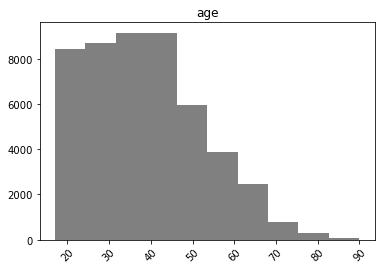

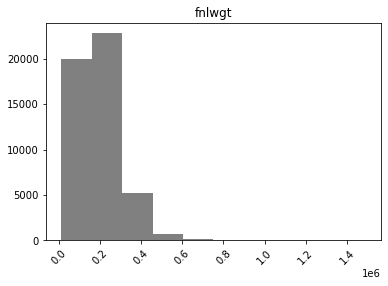

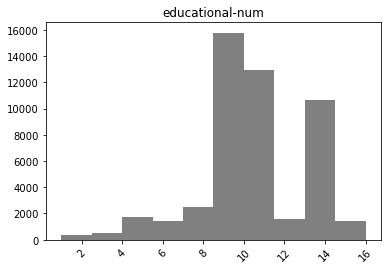

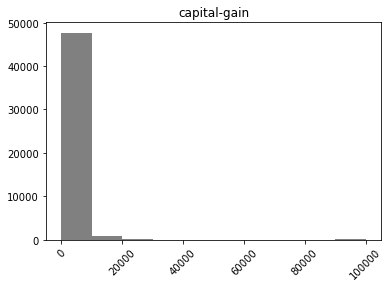

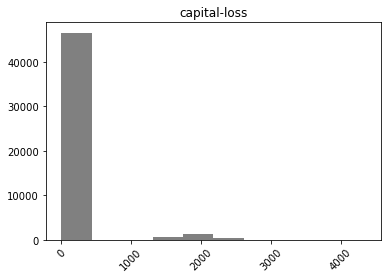

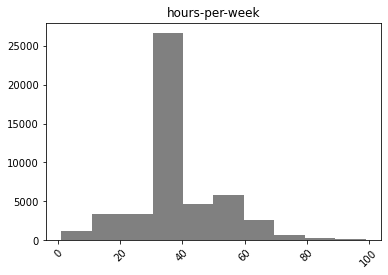

In [35]:
for x in df.columns:
    if df[x].dtype == "int64":
        plt.hist(df[x],color="grey")
        plt.title(x)
        plt.xticks(rotation=45)
        plt.show()
        
    else:
        pass
        

## Categorical Analysis

### Income(target variable)

### Count plot

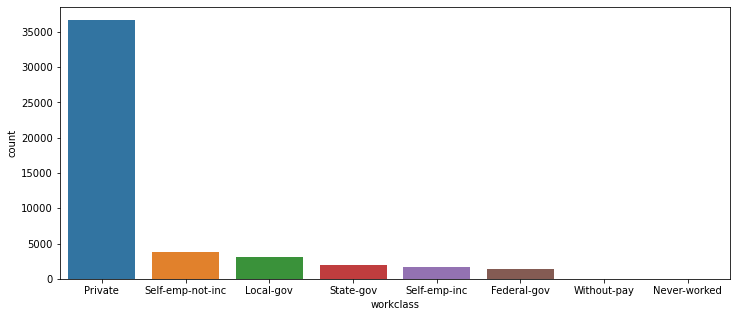

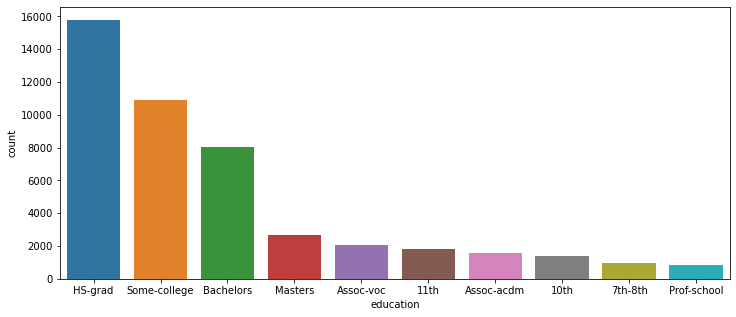

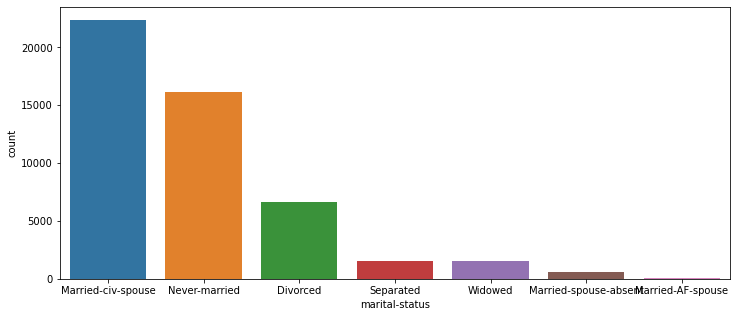

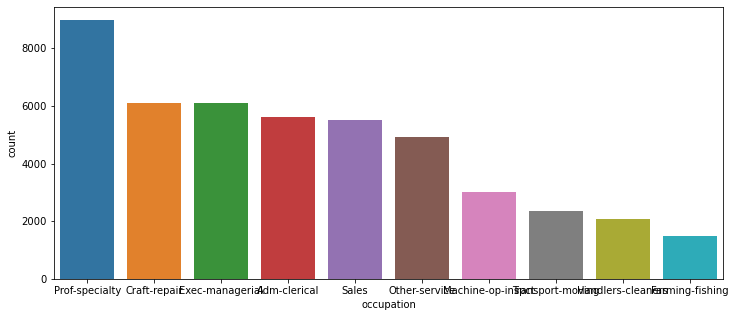

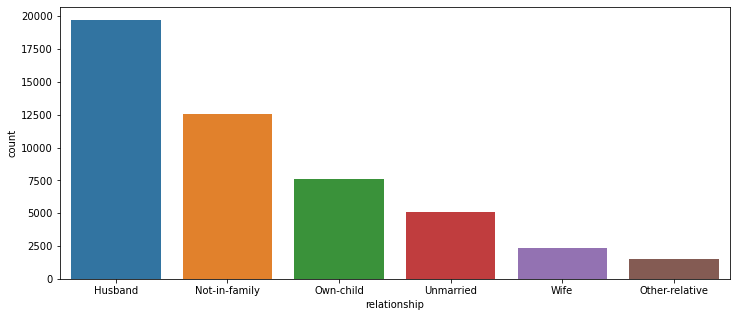

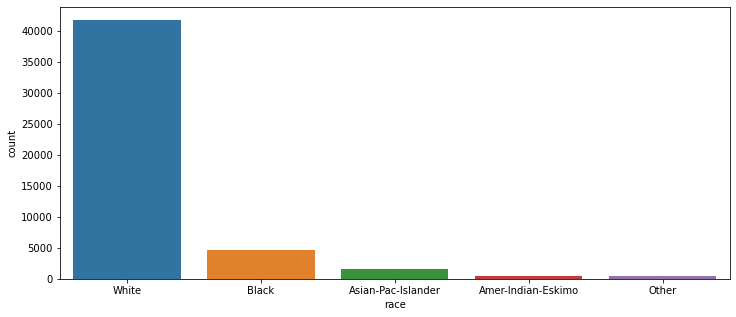

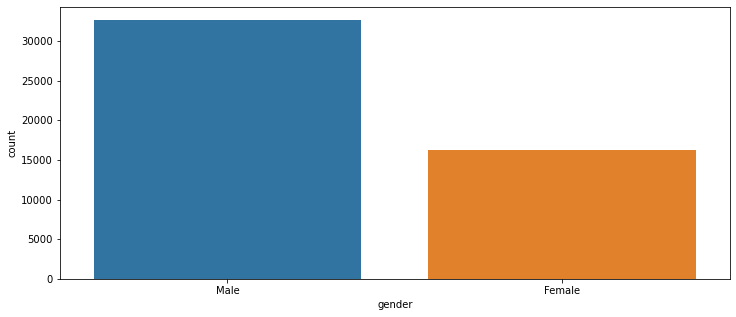

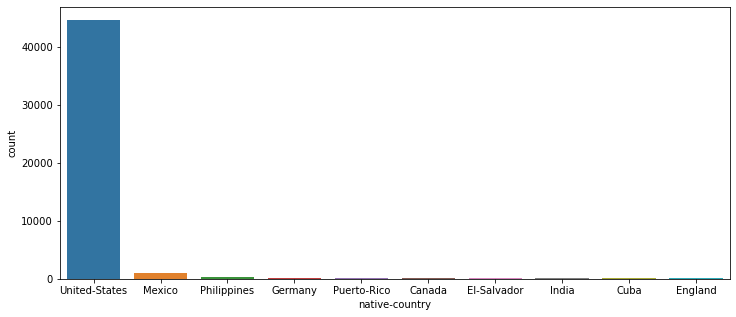

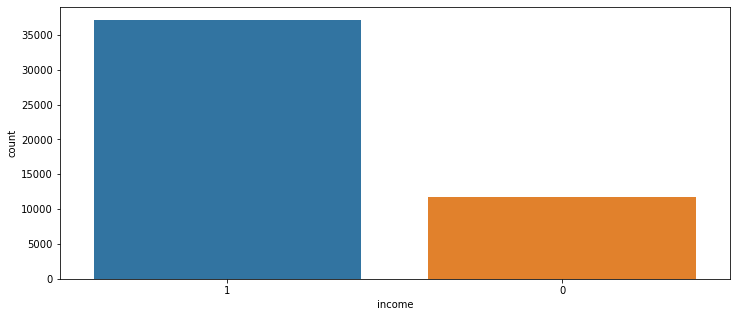

In [36]:
for i in catg_var:
    plt.figure(figsize=(12,5))
    sns.countplot(df[i].dropna(), order=df[i].value_counts().iloc[:10].index)

### Boxplot

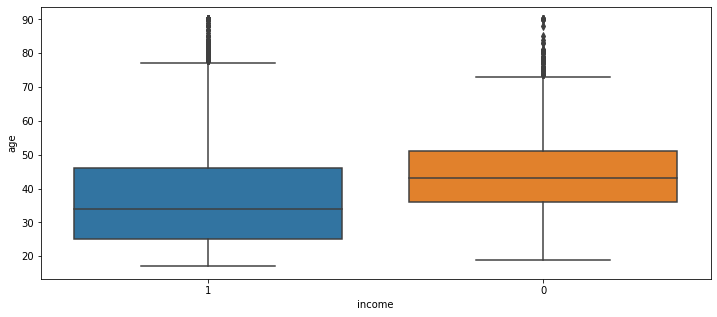

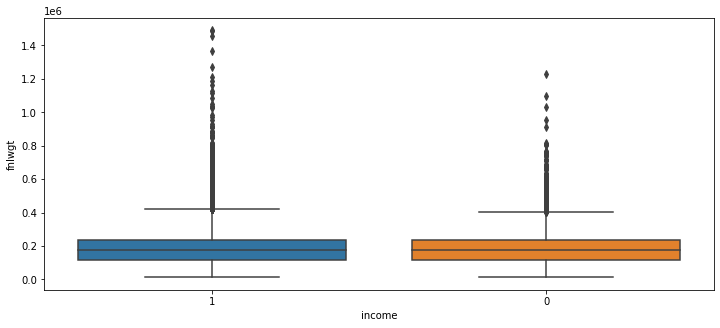

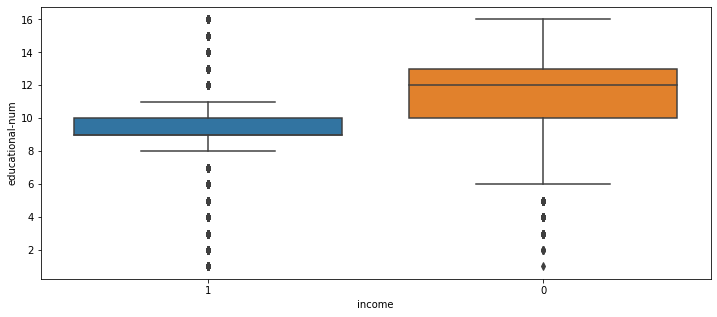

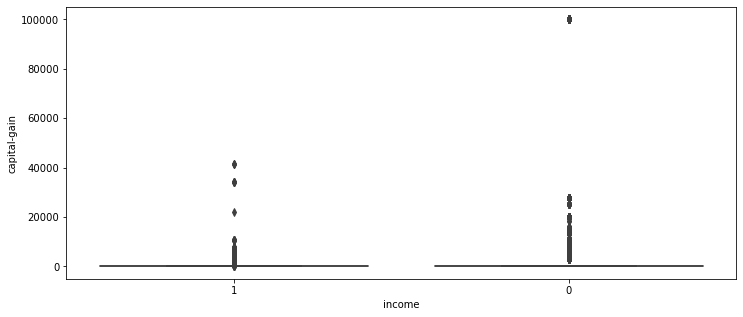

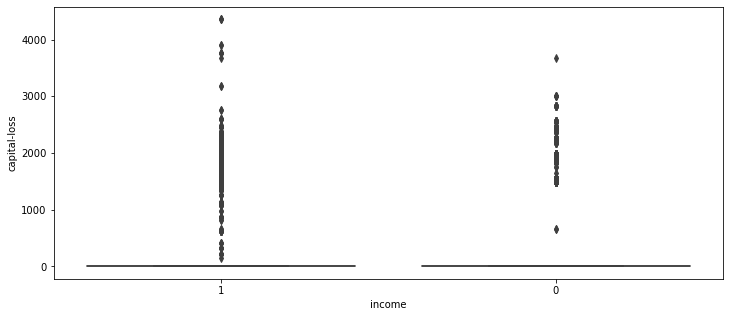

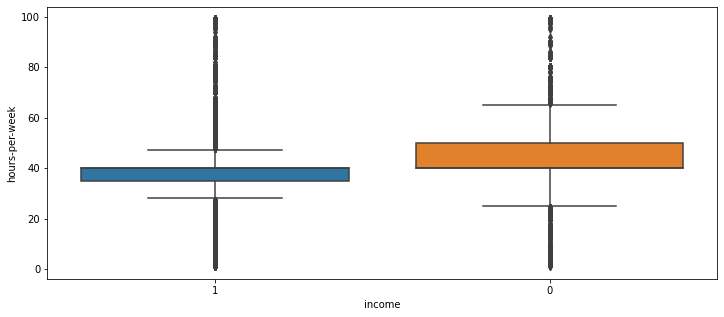

In [37]:
for i in num_var:
    plt.figure(figsize=(12,5))
    sns.boxplot(x="income",y=i,data=df)

    

# Bivariate Analysis

## Numerical vs Numerical Analysis

### Pairplot

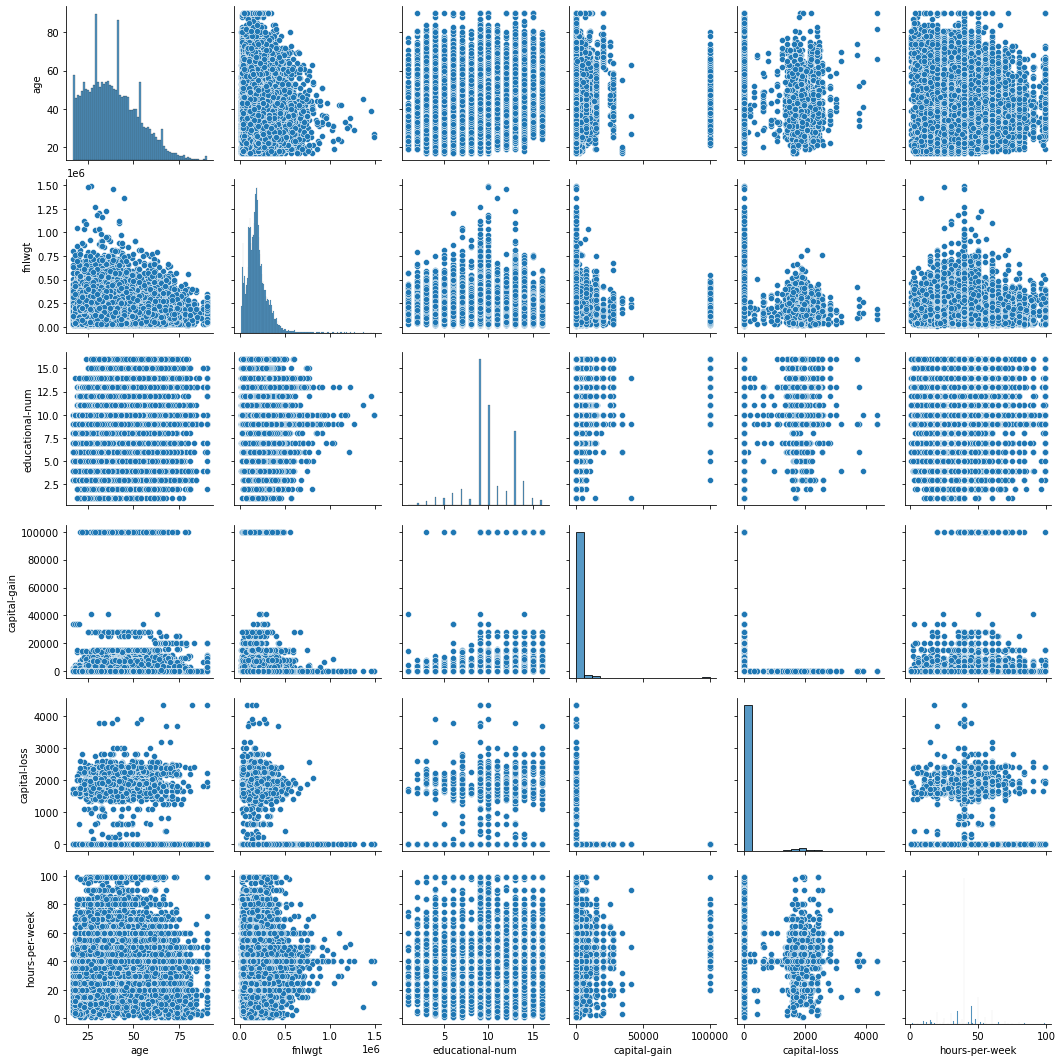

In [79]:
sns.pairplot(df)


### Scatter Plot

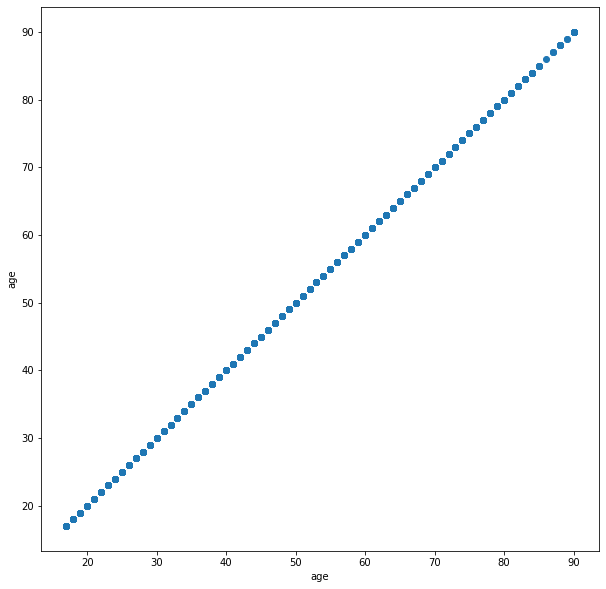

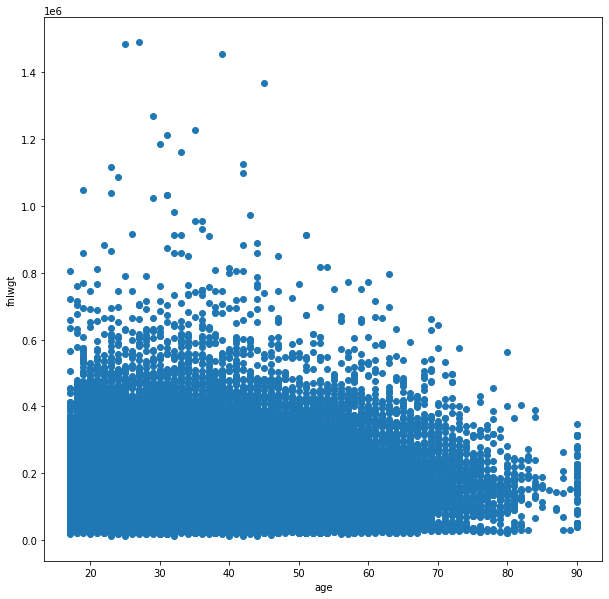

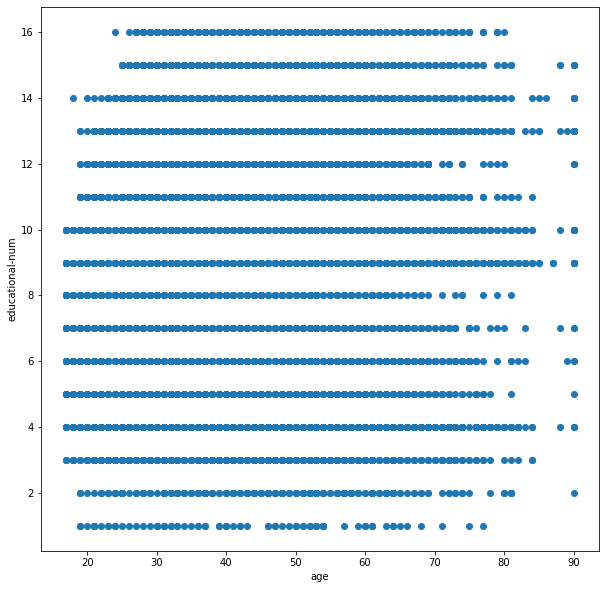

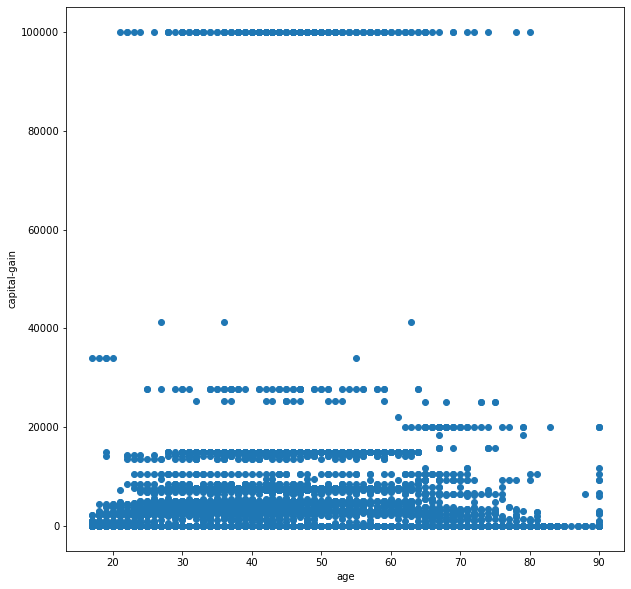

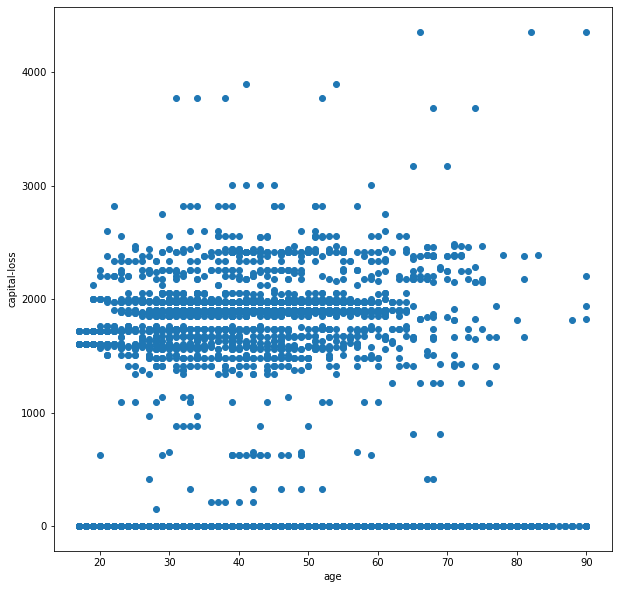

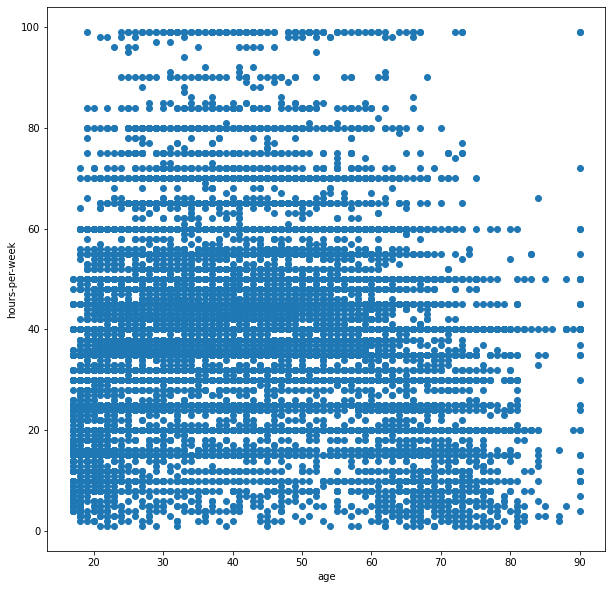

In [152]:
for i in num_var:
    plt.figure(figsize=(10,10))
    plt.xlabel('age')
    plt.ylabel(i)
    x=df['age']
    y=df[i]
    plt.scatter(x,y)
    


### Relation btw in capital-gain and capital-loss


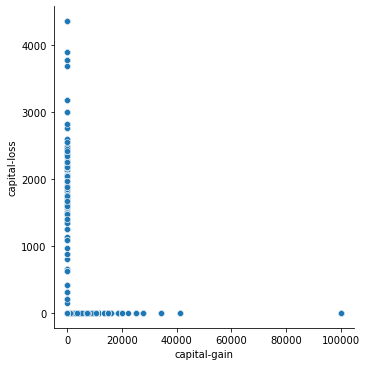

In [129]:
sns.relplot('capital-gain','capital-loss',data= df)
plt.xlabel('capital-gain')
plt.ylabel('capital-loss')
plt.show()

# Categorical vs Numerical Analysis

### Box Plot


Text(0.5, 1.0, 'Box plot of INCOME and AGE')

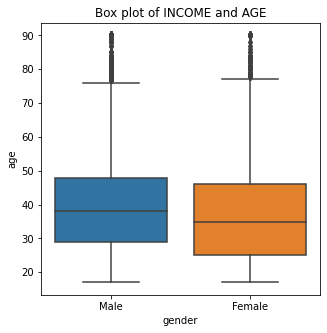

In [119]:
fig = plt.figure(figsize=(5,5))
sns.boxplot(x='gender',y='age',data=df).set_title('Box plot of INCOME and AGE')

### Barplot

<AxesSubplot:title={'center':'Occupation'}, xlabel='occupation'>

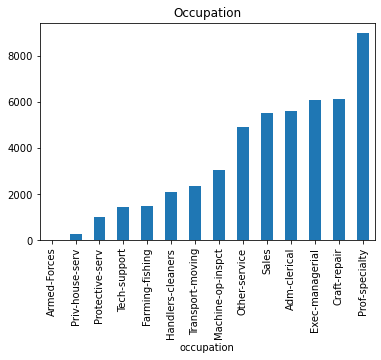

In [120]:
df1 =df.groupby('occupation').gender.count().sort_values()
plt.title('Occupation')
df1.plot.bar()


# Outliers Detection

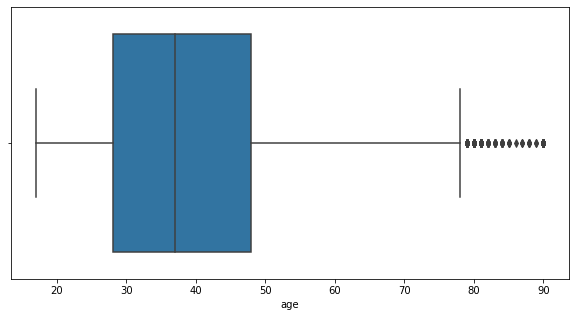

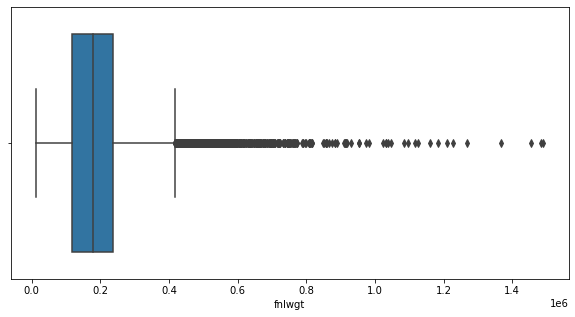

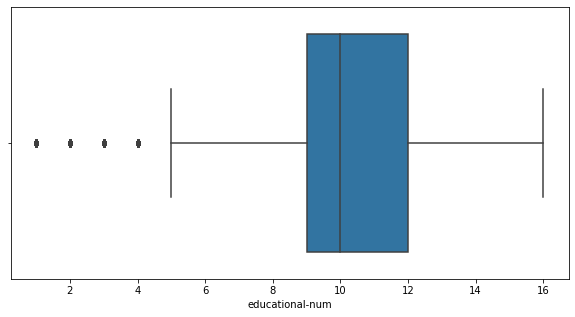

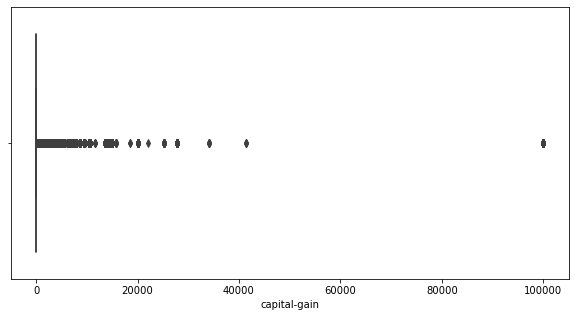

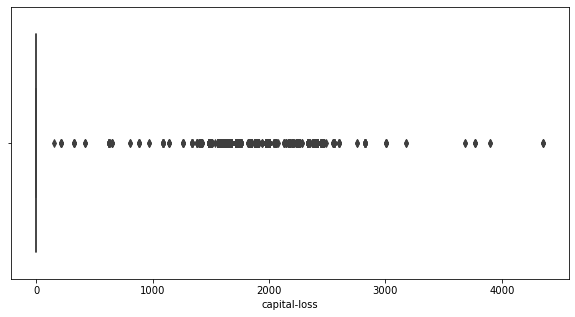

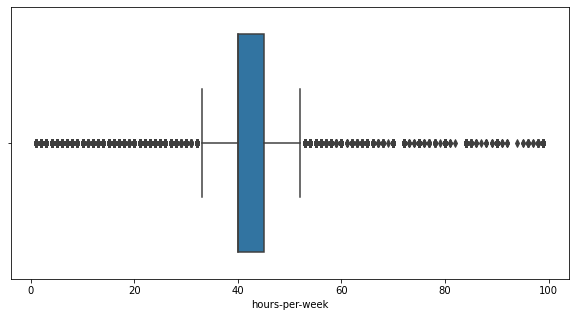

In [156]:
for i in num_var:
    plt.figure(figsize=(10,5))
    sns.boxplot(x=df[i])


In [157]:
df["age"].describe()

count    48842.000000
mean        38.643585
std         13.710510
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

<AxesSubplot:xlabel='age'>

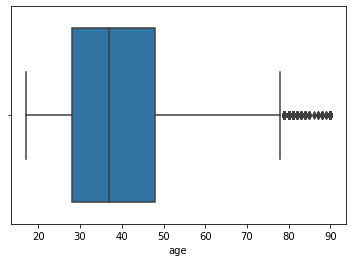

In [158]:
sns.boxplot(df["age"])

In [159]:
upper_boundary=df["age"].mean()+3*df["age"].std()
lower_boundary=df["age"].mean()-3*df["age"].std()
print(lower_boundary), print(upper_boundary),print(df["age"].mean())

-2.4879443645679373
79.77511524209137
38.64358543876172


(None, None, None)

In [160]:
IQR =df.age.quantile(0.75)-df.age.quantile(0.25)

In [161]:
IQR

20.0

In [162]:
lower_bridge=df["age"].quantile(0.25)-(IQR*1.5)
Upper_bridge=df["age"].quantile(0.75)+(IQR*1.5)
print(lower_bridge),print(Upper_bridge)


-2.0
78.0


(None, None)

In [163]:
### Extreme outliers
lower_bridge=df["age"].quantile(0.25)-(IQR*3)
Upper_bridge=df["age"].quantile(0.75)+(IQR*3)
print(lower_bridge),print(Upper_bridge)


-32.0
108.0


(None, None)

In [164]:
data=df.copy()

In [165]:
data.loc[data["age"]>=80,"age"]=80

In [166]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,1
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,1
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,0
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,0
4,18,Private,103497,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,1


<AxesSubplot:xlabel='age'>

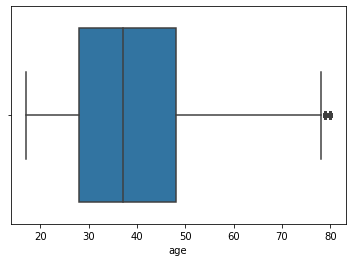

In [167]:
sns.boxplot(data["age"])

In [168]:
data["age"].describe()

count    48842.000000
mean        38.626797
std         13.654697
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         80.000000
Name: age, dtype: float64

In [169]:
upper_boundary=df["age"].mean()+2.5*df["age"].std()
lower_boundary=df["age"].mean()-2.5*df["age"].std()
print(lower_boundary), print(upper_boundary),print(df["age"].mean())

4.367310602653667
72.91986027486976
38.64358543876172


(None, None, None)

In [170]:
data1=data.copy()

In [171]:
data1.loc[data1["age"]>=73,"age"]=73

<AxesSubplot:xlabel='age'>

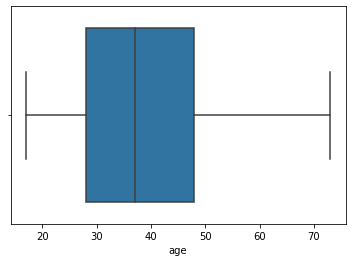

In [172]:
sns.boxplot(data1["age"])

# Feature Transformation


In [174]:
df['income'].replace('>50K',1,inplace=True)
df['income'].replace('<=50K',0,inplace=True)

In [175]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,1
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,1
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,0
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,0
4,18,Private,103497,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,1


In [176]:
df['income'].value_counts()


1    37155
0    11687
Name: income, dtype: int64

In [177]:
df['income'].value_counts(normalize = True)


1    0.760718
0    0.239282
Name: income, dtype: float64

In [178]:
df['gender'].value_counts(normalize=True)


Male      0.668482
Female    0.331518
Name: gender, dtype: float64

In [183]:
df_ft=pd.get_dummies(df, columns=catg_var)

In [221]:
df_ft

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income_0,income_1
0,25,226802,7,0,0,40,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
1,38,89814,9,0,0,50,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
2,28,336951,12,0,0,40,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
3,44,160323,10,7688,0,40,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
4,18,103497,10,0,0,30,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,257302,12,0,0,38,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
48838,40,154374,9,0,0,40,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
48839,58,151910,9,0,0,40,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
48840,22,201490,9,0,0,20,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1


In [184]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_scaled = pd.DataFrame(scaler.fit_transform(df_ft), columns = df_ft.columns)

In [219]:
df_scaled

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income_0,income_1
0,-0.995129,0.351675,-1.197259,-0.144804,-0.217127,-0.034087,-0.173795,-0.261940,-0.01431,0.575033,...,-0.02074,-0.048581,-0.036505,-0.024791,-0.023518,0.304846,-0.041999,-0.021705,-0.560845,0.560845
1,-0.046942,-0.945524,-0.419335,-0.144804,-0.217127,0.772930,-0.173795,-0.261940,-0.01431,0.575033,...,-0.02074,-0.048581,-0.036505,-0.024791,-0.023518,0.304846,-0.041999,-0.021705,-0.560845,0.560845
2,-0.776316,1.394723,0.747550,-0.144804,-0.217127,-0.034087,-0.173795,3.817672,-0.01431,-1.739029,...,-0.02074,-0.048581,-0.036505,-0.024791,-0.023518,0.304846,-0.041999,-0.021705,1.783024,-1.783024
3,0.390683,-0.277844,-0.030373,0.886874,-0.217127,-0.034087,-0.173795,-0.261940,-0.01431,0.575033,...,-0.02074,-0.048581,-0.036505,-0.024791,-0.023518,0.304846,-0.041999,-0.021705,1.783024,-1.783024
4,-1.505691,-0.815954,-0.030373,-0.144804,-0.217127,-0.841104,-0.173795,-0.261940,-0.01431,0.575033,...,-0.02074,-0.048581,-0.036505,-0.024791,-0.023518,0.304846,-0.041999,-0.021705,-0.560845,0.560845
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,-0.849254,0.640492,0.747550,-0.144804,-0.217127,-0.195490,-0.173795,-0.261940,-0.01431,0.575033,...,-0.02074,-0.048581,-0.036505,-0.024791,-0.023518,0.304846,-0.041999,-0.021705,-0.560845,0.560845
48838,0.098933,-0.334178,-0.419335,-0.144804,-0.217127,-0.034087,-0.173795,-0.261940,-0.01431,0.575033,...,-0.02074,-0.048581,-0.036505,-0.024791,-0.023518,0.304846,-0.041999,-0.021705,1.783024,-1.783024
48839,1.411808,-0.357510,-0.419335,-0.144804,-0.217127,-0.034087,-0.173795,-0.261940,-0.01431,0.575033,...,-0.02074,-0.048581,-0.036505,-0.024791,-0.023518,0.304846,-0.041999,-0.021705,-0.560845,0.560845
48840,-1.213941,0.111984,-0.419335,-0.144804,-0.217127,-1.648120,-0.173795,-0.261940,-0.01431,0.575033,...,-0.02074,-0.048581,-0.036505,-0.024791,-0.023518,0.304846,-0.041999,-0.021705,-0.560845,0.560845


# The Central Limit Theorem


The Central Limit theorem states that no matter what the distribution of the population, the sampling distribution of means will always approximate to Normal distribution as the size of the sample increases

and, the mean of the sampling distribution will approximately be equal to the population mean.

$$\mu =\bar{X}$$
finally, the standard deviation of sampling distribution will approximately be equal to the standard deviation of population divided by square root of the sample size "n".

$$\sigma_\bar{x} = \frac {\sigma}{\sqrt n}$$

### Prove Central Limit Theorem on ‘age’ column from the Adult Dataset



In [186]:
population=df["age"]

<AxesSubplot:xlabel='age', ylabel='Density'>

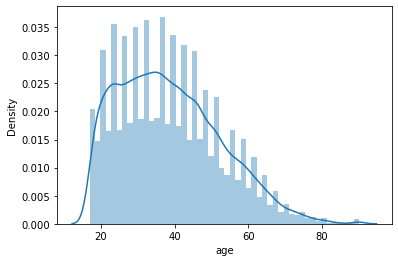

In [187]:
sns.distplot(df["age"])


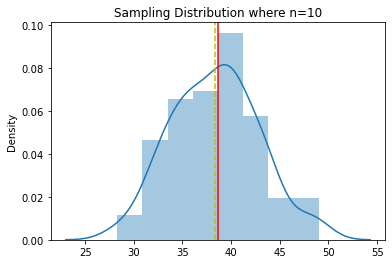

In [209]:
sample_means10=[df["age"].sample(n=10,random_state=i).mean() for i in range(100)]
sns.distplot(sample_means10)
plt.title("Sampling Distribution where n=10")
plt.axvline(np.mean(sample_means10), color='y', linestyle='--')
plt.axvline(np.median(sample_means10), color='r', linestyle='-')

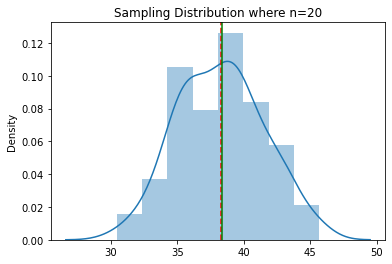

In [210]:
sample_means20=[df["age"].sample(n=20,random_state=i).mean() for i in range(100)]
sns.distplot(sample_means20)
plt.title("Sampling Distribution where n=20")
plt.axvline(np.mean(sample_means20), color='r', linestyle='--')
plt.axvline(np.median(sample_means20), color='g', linestyle='-')

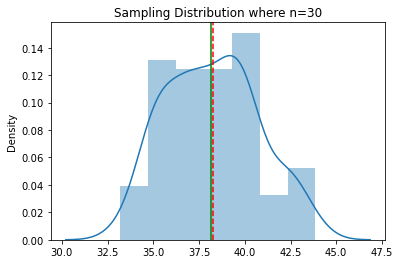

In [211]:
sample_means30=[df["age"].sample(n=30,random_state=i).mean() for i in range(100)]
sns.distplot(sample_means30)
plt.title("Sampling Distribution where n=30")
plt.axvline(np.mean(sample_means30), color='r', linestyle='--')
plt.axvline(np.median(sample_means30), color='g', linestyle='-')

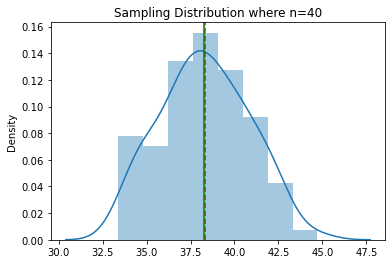

In [212]:
sample_means40=[df["age"].sample(n=40,random_state=i).mean() for i in range(100)]
sns.distplot(sample_means40)
plt.title("Sampling Distribution where n=40")
plt.axvline(np.mean(sample_means40), color='r', linestyle='--')
plt.axvline(np.median(sample_means40), color='g', linestyle='-')

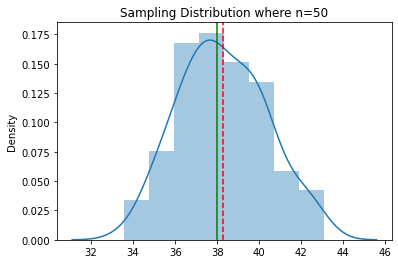

In [213]:
sample_means50=[df["age"].sample(n=50,random_state=i).mean() for i in range(100)]
sns.distplot(sample_means50)
plt.title("Sampling Distribution where n=50")
plt.axvline(np.mean(sample_means50), color='r', linestyle='--')
plt.axvline(np.median(sample_means50), color='g', linestyle='-')

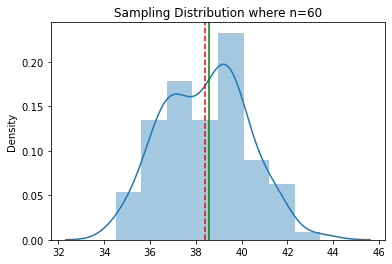

In [214]:
sample_means60=[df["age"].sample(n=60,random_state=i).mean() for i in range(100)]
sns.distplot(sample_means60)
plt.title("Sampling Distribution where n=60")
plt.axvline(np.mean(sample_means60), color='r', linestyle='--')
plt.axvline(np.median(sample_means60), color='g', linestyle='-')

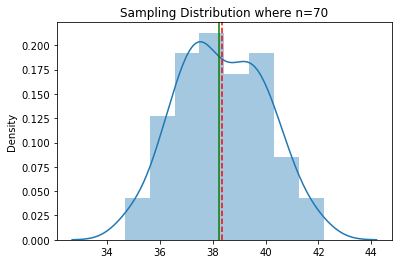

In [215]:

sample_means70=[df["age"].sample(n=70,random_state=i).mean() for i in range(100)]
sns.distplot(sample_means70)
plt.title("Sampling Distribution where n=70")
plt.axvline(np.mean(sample_means70), color='r', linestyle='--')
plt.axvline(np.median(sample_means70), color='g', linestyle='-')

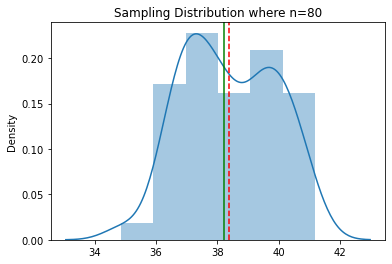

In [216]:

sample_means80=[df["age"].sample(n=80,random_state=i).mean() for i in range(100)]
sns.distplot(sample_means80)
plt.title("Sampling Distribution where n=80")
plt.axvline(np.mean(sample_means80), color='r', linestyle='--')
plt.axvline(np.median(sample_means80), color='g', linestyle='-')

- we can observe that as the sample size increases, the sampling distribution approximates normal distribution

In [217]:
print("We can observe that as the sample size increases, the sampling distribution approximates normal distribution")
print("\n")
print("The population mean {} is approximately equal to the mean of the sampling distribution {}".format(df["age"].mean(),np.mean(sample_means80)))
sam_std=np.std(sample_means80)
std_sqrt_n=df["age"].std()/(80)**0.5
print("\n")
print("The standard deviation of sampling distribution {} is approximately  equal to the standard deviation of population divided by square root of the sample size {}.".format(sam_std,std_sqrt_n))
print("\n")


We can observe that as the sample size increases, the sampling distribution approximates normal distribution


The population mean 38.64358543876172 is approximately equal to the mean of the sampling distribution 38.381875


The standard deviation of sampling distribution 1.5026002202432287 is approximately  equal to the standard deviation of population divided by square root of the sample size 1.5328816109800611.




### Hence Proved Central Limit Theorem



# Chi Square Test

- Use Chi Square Test to answer this question “Is there a relationship between occupation and gender? (or does the preference of occupation depend on the gender)”



- Hypothesis test (to test the relationship between occupation & gender)

- Null Hypothesis :- there is no relationship between "occupation" and "gender".
- Alternate Hypothesis :- there is some relationship between "occupation" and "gender".

In [222]:
# contingency table
c_t = pd.crosstab(df['occupation'],df['gender'],margins = True) 
c_t

gender,Female,Male,All
occupation,,,
Adm-clerical,3769,1842,5611
Armed-Forces,0,15,15
Craft-repair,323,5789,6112
Exec-managerial,1748,4338,6086
Farming-fishing,95,1395,1490
Handlers-cleaners,254,1818,2072
Machine-op-inspct,804,2218,3022
Other-service,2698,2225,4923
Priv-house-serv,228,14,242


In [223]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

In [225]:
stat, p, dof, expected = chi2_contingency(c_t)
print('dof=%d' % dof)
print('p_value', p)
print(expected)

dof=28
p_value 0.0
[[1.86014725e+03 3.75085275e+03 5.61100000e+03]
 [4.97276934e+00 1.00272307e+01 1.50000000e+01]
 [2.02623775e+03 4.08576225e+03 6.11200000e+03]
 [2.01761828e+03 4.06838172e+03 6.08600000e+03]
 [4.93961754e+02 9.96038246e+02 1.49000000e+03]
 [6.86905205e+02 1.38509480e+03 2.07200000e+03]
 [1.00184726e+03 2.02015274e+03 3.02200000e+03]
 [1.63206290e+03 3.29093710e+03 4.92300000e+03]
 [8.02273453e+01 1.61772655e+02 2.42000000e+02]
 [2.97736276e+03 6.00363724e+03 8.98100000e+03]
 [3.25882151e+02 6.57117849e+02 9.83000000e+02]
 [1.82467483e+03 3.67932517e+03 5.50400000e+03]
 [4.79374964e+02 9.66625036e+02 1.44600000e+03]
 [7.80724786e+02 1.57427521e+03 2.35500000e+03]
 [1.61920000e+04 3.26500000e+04 4.88420000e+04]]


In [226]:
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

probability=0.950, critical=41.337, stat=8719.056
Dependent (reject H0)


- There is a relationship between occupation and gender, meaning the occupation of a person depends on gender¶
